Загрузим данные по пассажирам Титаника

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('.data/titanic/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = data.copy()

Исходя из того, что каюты более высокого класса находились выше и ближе к палубе, первое предположение заключается в том, что процент выживших больше в первом классе и меньше в третьем

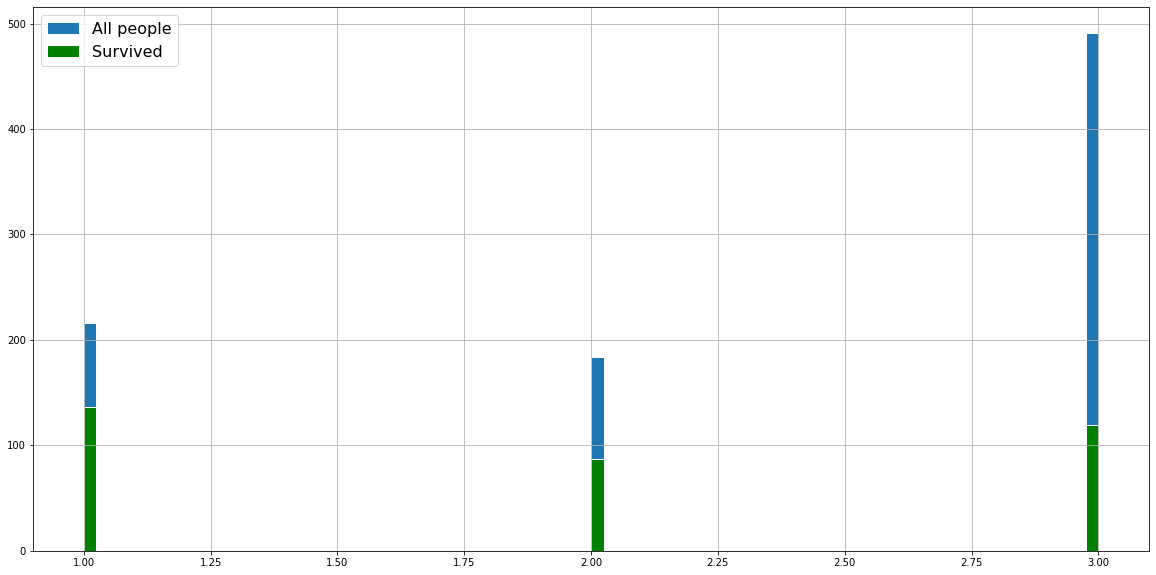

In [11]:
ax = df['Pclass'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

df[df['Survived'] == 1]['Pclass'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['All people', 'Survived'], prop={'size':16})

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


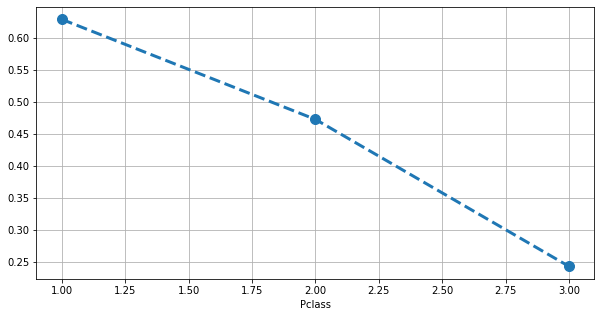

In [13]:
series = df.groupby(['Pclass'])['Survived'].sum() / df.groupby(['Pclass'])['Survived'].count()
print(series)
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

И действительно процент выживших среди пассажиров первого класса составляет 63%, в то время как в третьем классе выжило лишь 24% пассажиров.

Предположение 2

Предположим, что выше процент выживших среди пассажиров из 1 класса категории женщины и дети, т.к. их могли эвакуировать в первую очередь.

добавим столбец с признаком отнесения к категории женщины и дети

In [7]:
df['wc'] = 0
for row in range(len(df)):
  if df['Age'].loc[row] <= 18 or df['Sex'].loc[row] == 'Female':
    df['wc'].loc[row] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


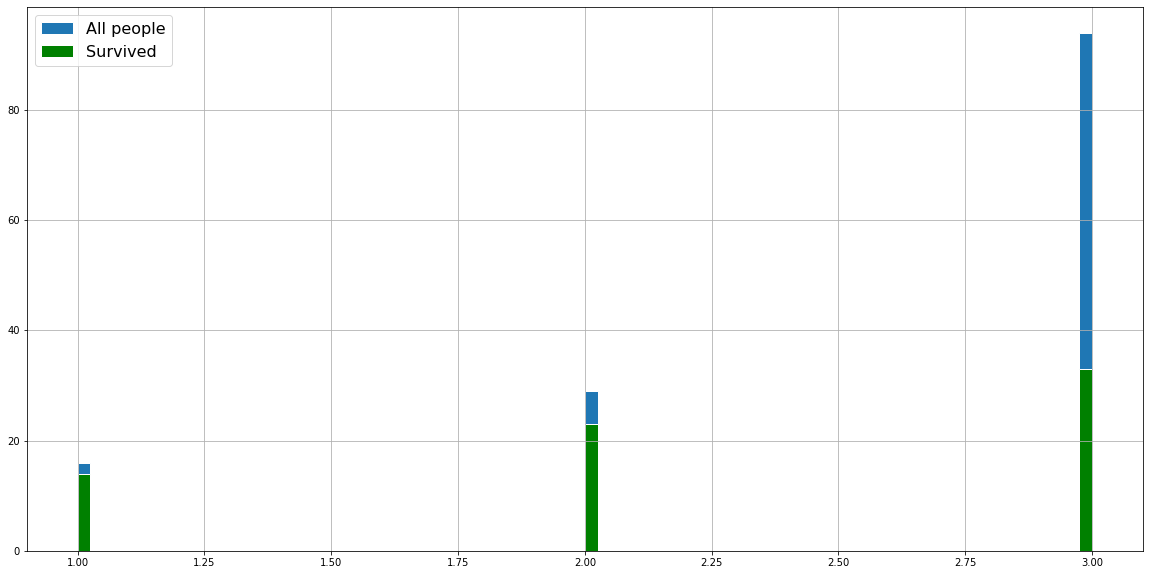

In [8]:
ax = df[df['wc'] == 1]['Pclass'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

df[df['Survived'] == 1][df['wc'] == 1]['Pclass'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['All people', 'Survived'], prop={'size':16})

Pclass  wc
1       0     0.610000
        1     0.875000
2       0     0.412903
        1     0.793103
3       0     0.216625
        1     0.351064
Name: Survived, dtype: float64


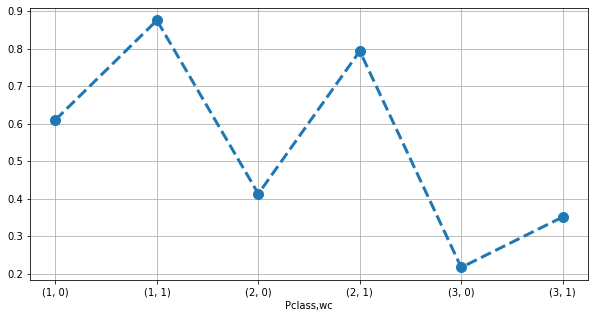

In [16]:
series = df.groupby(['Pclass', 'wc'])['Survived'].sum() / df.groupby(['Pclass', 'wc'])['Survived'].count()
print(series)
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

Средний процент ввыживаемости среди женщин и детей получился на уровнуе 51%. При этом в первом классе выжило 87,5% женщин и детей и 61% мужчин в то время как в третьем классе процент выживших составил лишь 35% и 22% соответственно.

Предположение 3

Если предположить, что в третьем классе каюты располагались на разных уровнях и цена билета зависела от близости к верхней палубе и более высоким классам кают, то можно ожидать, что среди выживших в 3 классе больше процент если цена билета была более высокой.

In [25]:
df3 = df[df['Pclass'] == 3]
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,wc,Fare_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,"(-0.512, 51.233]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(-0.512, 51.233]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(-0.512, 51.233]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,"(-0.512, 51.233]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,"(-0.512, 51.233]"


In [32]:
fare_labels = range(1, 11)
df3['Fare_int'] = pd.cut(df3.Fare, 10, labels = fare_labels)
df3.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,wc,Fare_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,3
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,0,5
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,2


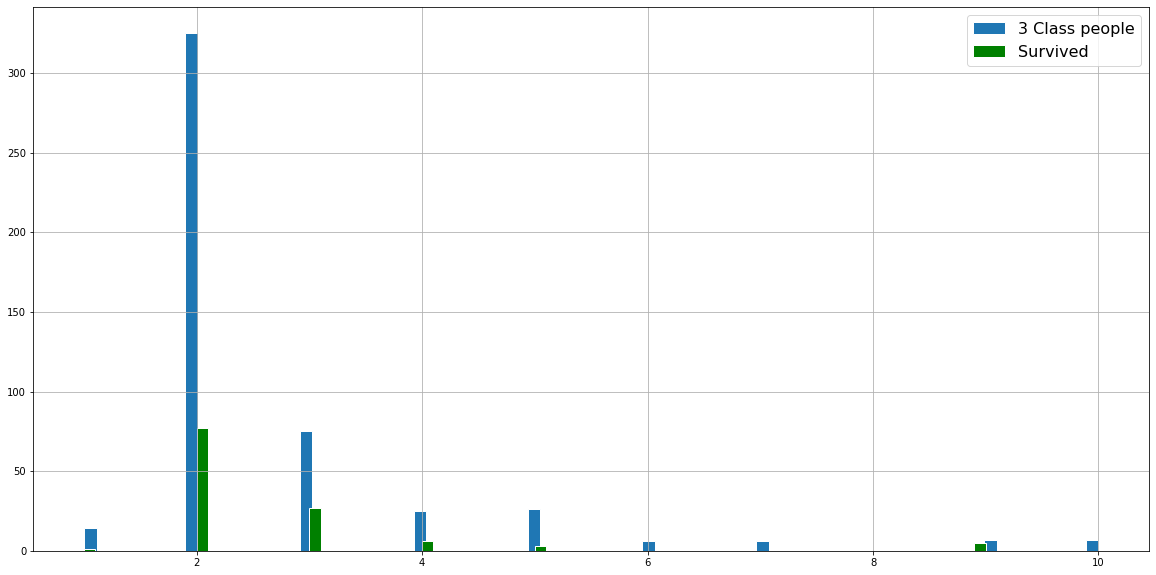

In [33]:
ax = df3['Fare_int'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

df3[df3['Survived'] == 1]['Fare_int'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['3 Class people', 'Survived'], prop={'size':16})

In [42]:
df3['Fare_int'].value_counts()

2     325
3      75
5      26
4      25
1      14
10      7
9       7
7       6
6       6
8       0
Name: Fare_int, dtype: int64

1     0.071429
2     0.236923
3     0.360000
4     0.240000
5     0.115385
6     0.000000
7     0.000000
8          NaN
9     0.714286
10    0.000000
dtype: float64


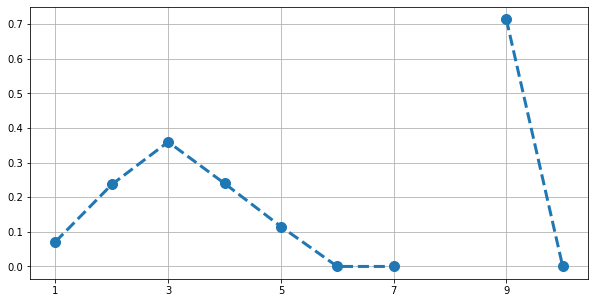

In [39]:
series = df3.groupby(['Fare_int'])['Survived'].sum() / df3['Fare_int'].value_counts()
print(series)
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

Версия не верна, т.к. процент выживших среди билетов со средней стоимостью ниже более дешевых. Но в данном случае получилась не репрезентативная выборка, т.к. количество пассажиров со стоимостью билетов 2 ценовой группы снизу было самое большое (325 человек), в то время как в группах 5-7, 9 их всего по 6-7 человек.